# Excitation functions

In [ ]:
# | default_exp excitations

In [ ]:
# | exporti
import numpy as np

In [ ]:
# | hide
import matplotlib.pyplot as plt

In [ ]:
# | export


def create_1d_raised_cosine(
    duration: float,
    start_time: float,
    end_time: float,
    amplitude: float,
    sample_rate: float,
):
    """
    Create a 1D raised cosine excitation with time parameters in seconds.

    Parameters
    ----------
    duration : float
        Total duration of the excitation (in seconds).
    start_time : float
        Start time of the excitation (in seconds).
    end_time : float
        End time of the excitation (in seconds).
    amplitude : float
        Amplitude of the excitation.
    sample_rate : float
        Sample rate (samples per second).

    Returns
    -------
    excitation : ndarray
        The excitation signal.
    """
    num_samples = int(duration * sample_rate)
    excitation = np.zeros(num_samples)

    start_index = int(start_time * sample_rate)
    end_index = int(end_time * sample_rate)

    if start_index < 0 or end_index > num_samples or start_index >= end_index:
        raise ValueError("Invalid start_time or end_time range.")

    excitation[start_index:end_index] = (
        amplitude
        * (1 - np.cos(2 * np.pi * np.linspace(0, 1, end_index - start_index)))
        / 2
    )

    return excitation

[<matplotlib.lines.Line2D>]

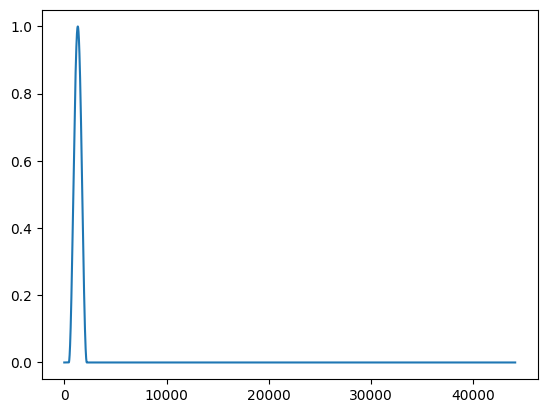

In [ ]:
rc = create_1d_raised_cosine(
    1,
    0.01,
    0.05,
    1,
    44100,
)

plt.plot(rc)

In [ ]:
# | export


def create_raised_cosine(Nx, Ny, h, ctr, epsilon, wid):
    """
    Create a raised cosine function on a 2D grid.

    Parameters:
        Nx (int): Number of grid points in the x-direction.
        Ny (int): Number of grid points in the y-direction.
        h (float): Grid spacing.
        ctr (tuple): Center of the raised cosine (x, y).
        epsilon (float): Scaling parameter.
        wid (float): Width of the cosine.

    Returns:
        np.ndarray: Flattened raised cosine array.
    """
    # Create the grid
    X, Y = np.meshgrid(np.arange(0, Nx + 1) * h, np.arange(0, Ny + 1) * h)

    # Compute the distance
    dist_x = (X - ctr[0]) ** 2
    dist_y = (Y - ctr[1]) ** 2
    dist = np.sqrt(dist_x + dist_y)

    # Compute the indicator function
    ind = np.sign(np.maximum(-dist + wid / 2, 0))

    # Compute the raised cosine
    rc = 0.5 * ind.T * (1 + np.cos(2 * np.pi * dist.T / wid))

    # Flatten the array
    # rc = rc.ravel()
    return rc, X, Y, dist, dist_x, dist_y

In [ ]:
from matplotlib import pyplot as plt

<matplotlib.image.AxesImage>

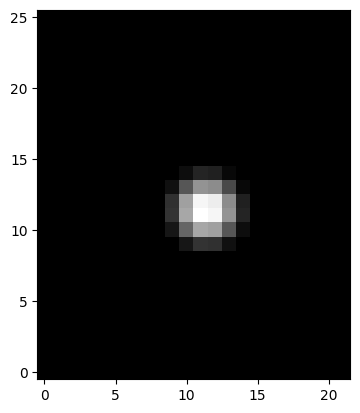

In [ ]:
# Example usage
Nx, Ny = 25, 21  # Grid dimensions
h = 0.0438  # Grid spacing
ctr = (0.5, 0.5)  # Center of the raised cosine
epsilon = 1.2000  # Scaling parameter
wid = 0.3  # Width of the cosine

rc, X, Y, dist, distx, disty = create_raised_cosine(
    Nx,
    Ny,
    h,
    ctr,
    epsilon,
    wid,
)

plt.imshow(rc, cmap="gray", origin="lower")

In [ ]:
# | export


def create_pluck_modal(
    lambdas: np.ndarray,  # eigenvalues of the Laplacian operator
    pluck_position: float = 0.28,  # position of pluck on the string in meters
    initial_deflection: float = 0.03,  # initial deflection of the string in meters
    string_length: float = 1.0,  # total length of the string in meters
) -> np.ndarray:
    """
    Create a pluck excitation for a string with a given length and pluck position.
    The pluck is modeled in the modal domain.

    Parameters
    ----------
    wavenumbers : np.ndarray
        The wavenumbers of the modes.
    xe : float
        The position of the pluck in meters.
    hi : float
        The initial deflection of the string in meters.
    length : float
        The length of the string in meters.

    Returns
    -------
    np.ndarray
        The pluck excitation in the modal domain.
    """

    lambdas_sqrt = np.sqrt(lambdas)

    # Scaling factor for the initial deflection
    deflection_scaling = initial_deflection * (
        string_length / (string_length - pluck_position)
    )

    # Compute the coefficients
    coefficients = (
        deflection_scaling
        * np.sin(lambdas_sqrt * pluck_position)
        / (lambdas_sqrt * pluck_position)
    )
    coefficients /= lambdas_sqrt

    return coefficients